In [1]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /Users/jinceyang/Desktop/codebase/ml/learn_d2l/chap8
Added /Users/jinceyang/Desktop/codebase/ml/learn_d2l to Python path


In [2]:
import importlib
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import numpy as np

import importlib
from d2l.classification.model import AlexNetClassifierTorch
from d2l.classification.dataset import FashionMNISTDataset
from d2l.base.trainer import Trainer
from d2l.base.evaluator import ClassificationEvaluator
from d2l.base.plot import plot_loss, plot_losses, show_images
from typing import List
from matplotlib import pyplot as plt
import torch
import numpy as np

from d2l.base.function import corr2d, corr2d_multi_in, corr2d_multi_in_out, corr2d_multi_in_out_1x1, comp_conv2d, max_pool2d, avg_pool2d

In [3]:
data = FashionMNISTDataset()

In [4]:
rng = torch.Generator().manual_seed(42)

In [5]:
alexnet = AlexNetClassifierTorch(num_outputs=10, rng=rng)

In [6]:
alexnet.init((10, 1, 28, 28))
alexnet.layer_summary((10, 1, 28, 28))

              Conv2d  input shape: torch.Size([10, 1, 28, 28])
              Conv2d  output shape: torch.Size([10, 32, 28, 28])
                ReLU  input shape: torch.Size([10, 32, 28, 28])
                ReLU  output shape: torch.Size([10, 32, 28, 28])
           MaxPool2d  input shape: torch.Size([10, 32, 28, 28])
           MaxPool2d  output shape: torch.Size([10, 32, 13, 13])
              Conv2d  input shape: torch.Size([10, 32, 13, 13])
              Conv2d  output shape: torch.Size([10, 64, 13, 13])
                ReLU  input shape: torch.Size([10, 64, 13, 13])
                ReLU  output shape: torch.Size([10, 64, 13, 13])
           MaxPool2d  input shape: torch.Size([10, 64, 13, 13])
           MaxPool2d  output shape: torch.Size([10, 64, 6, 6])
              Conv2d  input shape: torch.Size([10, 64, 6, 6])
              Conv2d  output shape: torch.Size([10, 128, 6, 6])
                ReLU  input shape: torch.Size([10, 128, 6, 6])
                ReLU  output shape: torc

In [7]:
def eval_on_epoch(model, epoch_id, batch_losses):
    evaluator = ClassificationEvaluator(model)
    loss = evaluator.loss(data.get_test_dataloader(batch_size=data.test_size))
    print(f'Epoch {epoch_id}, validation loss {loss:.4f}')
    accuracy = evaluator.accuracy(data.get_test_dataloader(batch_size=data.test_size))
    print(f'Epoch {epoch_id}, validation accuracy {accuracy:.4f}')

In [8]:
trainer = Trainer(
    model=alexnet,
    optimizer=torch.optim.Adam(alexnet.net.parameters(), lr=0.005),
    on_train_epoch_end=eval_on_epoch
)

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 0, validation loss 0.4620
Epoch 0, validation accuracy 0.8276


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 1, validation loss 0.3932
Epoch 1, validation accuracy 0.8560


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 2, validation loss 0.3409
Epoch 2, validation accuracy 0.8681


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 3, validation loss 0.3520
Epoch 3, validation accuracy 0.8743


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 4, validation loss 0.3184
Epoch 4, validation accuracy 0.8881


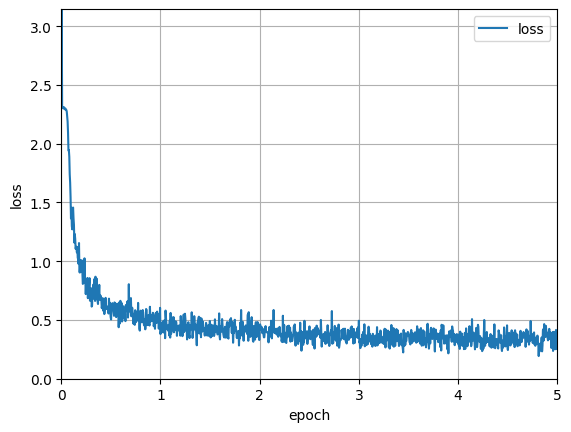

In [9]:
epoch_losses = trainer.train(
    data.get_train_dataloader_epochs(batch_size=256, num_epochs=5)
)
fig, ax = plt.subplots()
plot_loss(ax, epoch_losses)

In [10]:
evaluator = ClassificationEvaluator(alexnet)
test_loss = evaluator.loss(data.get_test_dataloader(data.test_size))
print(f'Test loss: {test_loss:.4f}')
accuracy = evaluator.accuracy(data.get_test_dataloader(data.test_size))
print(f'Test accuracy: {accuracy:.2%}')

Test loss: 0.3184
Test accuracy: 88.81%


In [11]:
# save the model
alexnet.save('alexnet_fashion_mnist.pth')